In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib

In [2]:
fraud = pd.read_csv("K:\DATA SCIENCE\DataSets\Fraud.csv")

In [3]:
fraud.shape

(6362620, 11)

In [4]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fraud['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

this dataset is highly unbalanced as normal transactions are much more than fraudulent transactions.


In [6]:
fraud['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
fraud['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# 1. Data cleaning including missing values, outliers and multi-collinearity.  

## A) Finding the missing values.

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in the dataset.

## B) Outliers

It is a financial data and there is no point in finding outliers in this data, because value of any numeric column can be anything and it will still be considered as valid and not an outlier.

In [10]:
num_columns = fraud.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [11]:
num_column = num_columns.drop(['step','isFraud', 'isFlaggedFraud'])

In [12]:
total_num = len(num_column)

In [13]:
total_num

5

there are 5 numeric columns.

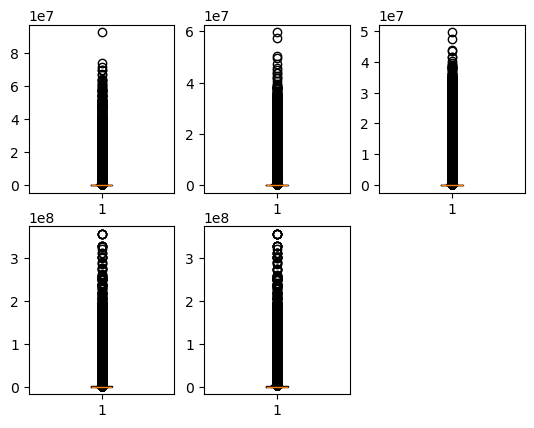

In [14]:
plt.subplot(2, 3, 1)
plt.boxplot(fraud['amount'])


plt.subplot(2, 3, 2)
plt.boxplot(fraud['oldbalanceOrg'])


plt.subplot(2, 3, 3)
plt.boxplot(fraud['newbalanceOrig'])


plt.subplot(2, 3, 4)
plt.boxplot(fraud['oldbalanceDest'])


plt.subplot(2, 3, 5)
plt.boxplot(fraud[ 'newbalanceDest'])

plt.show()

## C) Multi-collinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calculating VIf to check the Data based Multi-collinearity between variables -

In [16]:
fraud1 = fraud.drop(columns = ['type','nameOrig','nameDest','isFraud','isFlaggedFraud'], axis =1)
fraud1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


In [17]:
vif_data = pd.DataFrame()                         
vif_data["feature"] = fraud1.columns
vif_data["VIF"] = [variance_inflation_factor(fraud1.values, i)
                          for i in range(len(fraud1.columns))]
print(vif_data)

          feature         VIF
0            step    1.188495
1          amount    4.011315
2   oldbalanceOrg  465.122355
3  newbalanceOrig  466.903890
4  oldbalanceDest   71.765327
5  newbalanceDest   83.231611


As we can see there is high collinearity between newbalance and oldbalance

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()

In [20]:
fraud.type=label.fit_transform(fraud.type)

In [21]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


We wiil also have to check structural multicollinearity after doing label encoding

In [22]:
fraud2 = fraud.drop(columns = ['nameOrig','nameDest','isFraud','isFlaggedFraud'], axis =1)
fraud2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [23]:
vif_data1 = pd.DataFrame()                         
vif_data1["feature"] = fraud2.columns
vif_data1["VIF"] = [variance_inflation_factor(fraud2.values, i)
                          for i in range(len(fraud2.columns))]
print(vif_data1)

          feature         VIF
0            step    2.235180
1            type    2.075260
2          amount    4.013539
3   oldbalanceOrg  480.226670
4  newbalanceOrig  483.729602
5  oldbalanceDest   72.071759
6  newbalanceDest   83.549914


After doing label encoding also, we can see there is high collinearity between newbalance and oldbalance

## isFraud: 

In [24]:
fraud_counts = fraud.groupby("type")["isFraud"].sum()
fraud_counts

type
0       0
1    4116
2       0
3       0
4    4097
Name: isFraud, dtype: int64

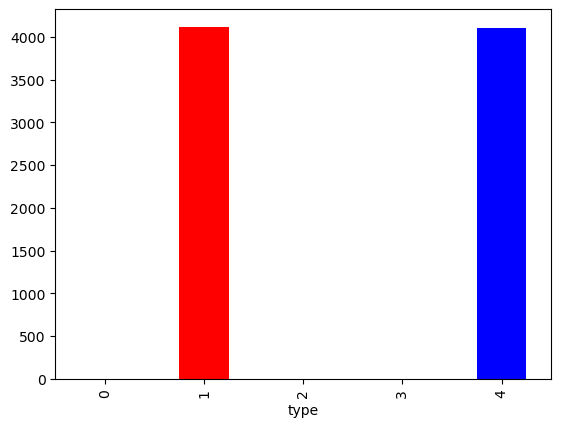

In [25]:
fraud_counts.plot(kind="bar", color=["blue", "red"])
plt.show()

Types of transfer where transaction is fraud are 1 and 4 (i.e cash out and transfer)

## isFlaggedFraud:

In [26]:
fraud['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Out of all transactions, only 16 were flagged as fraud, which means the flagged system rarely detects all fraudulent transaction. However, if a transaction is flagged, it is definitively fraudulent.

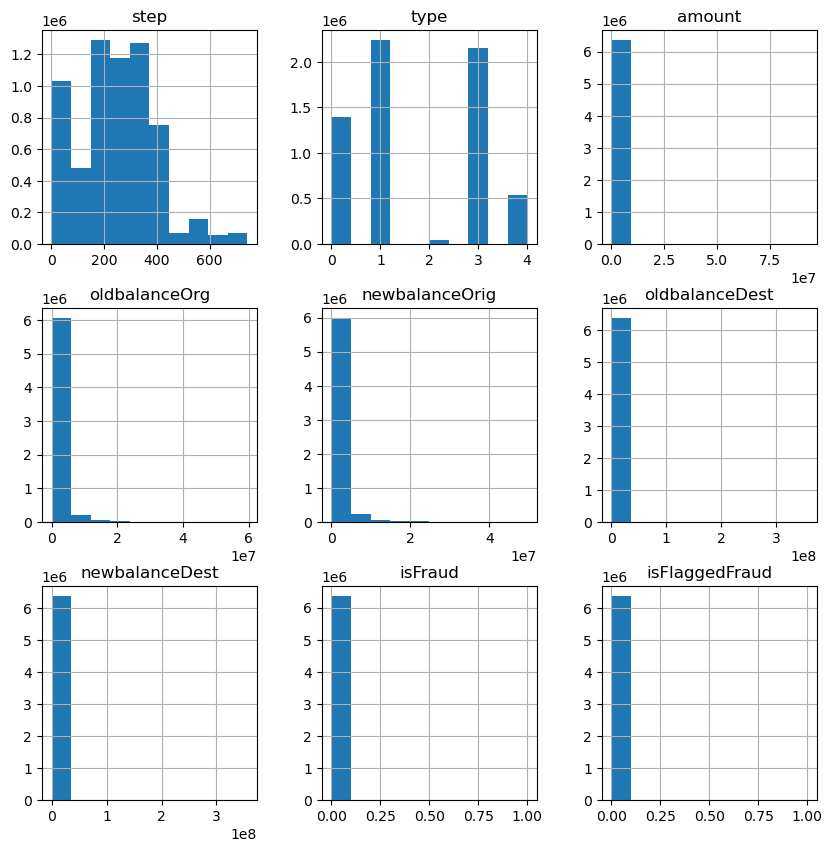

In [27]:
fraud.hist(bins=10,figsize=(10,10))
plt.show()

In [28]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Removing unused columns.

In [29]:
fraud3 = fraud.drop(['step','nameOrig','nameDest'], axis =1)
fraud3

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [30]:
X = fraud3.drop(['isFraud'],axis =1)
y = fraud3['isFraud']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

## XGBoost

In [32]:
from sklearn.metrics import confusion_matrix, classification_report 
from xgboost import XGBClassifier

In [33]:
model1 = XGBClassifier()

In [34]:
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
predictions0 = model1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions0)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.77      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [36]:
from sklearn.metrics import average_precision_score

In [37]:
aps1 = average_precision_score(y_test, predictions0)
print("Average Precision Score for XGBoost with out over sampling is: {}".format(aps1))

Average Precision Score for XGBoost with out over sampling is: 0.7421690324318337


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf1 = RandomForestClassifier(n_estimators = 100)  

In [40]:
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
predictions01 = clf1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions01)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.77      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [42]:
aps2 = average_precision_score(y_test, predictions01)
print("Average Precision Score for Random Forest with out over sampling is: {}".format(aps2))

Average Precision Score for Random Forest with out over sampling is: 0.7511787503970858


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree1 = DecisionTreeClassifier()

In [45]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
predictions02 = tree1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions02)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.91      0.89      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [47]:
aps3 = average_precision_score(y_test, predictions02)
print("Average Precision Score for Decision Tree with out over sampling is: {}".format(aps3))

Average Precision Score for Decision Tree with out over sampling is: 0.8088830841744998


## Over sampling using SMOTE (synthetic minority oversampling technique)

In [48]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [49]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

In [50]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (10167052, 7)
After OverSampling, the shape of train_y: (10167052,) 

After OverSampling, counts of label '1': 5083526
After OverSampling, counts of label '0': 5083526


Now our data is oversampled we will apply algorithms on it.

## XGBoost 

In [51]:
from sklearn.metrics import confusion_matrix, classification_report 
from xgboost import XGBClassifier

In [52]:
model = XGBClassifier()

In [53]:
model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
predictions = model.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.35      0.99      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.67      1.00      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524



In [55]:
aps01 = average_precision_score(y_test, predictions)
print("Average Precision Score for XGBoost with over sampling is: {}".format(aps01))

Average Precision Score for XGBoost with over sampling is: 0.34733524214986483


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier(n_estimators = 100)  

In [58]:
clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [59]:
predictions1 = clf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions1)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.64      0.96      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [60]:
aps02 = average_precision_score(y_test, predictions1)
print("Average Precision Score for Random Forest with over sampling is: {}".format(aps02))

Average Precision Score for Random Forest with over sampling is: 0.6124919137718317


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree = DecisionTreeClassifier()

In [63]:
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [64]:
predictions2 = tree.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions2)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.71      0.98      0.82      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [65]:
aps03 = average_precision_score(y_test, predictions2)
print("Average Precision Score for Decision Tree with over sampling is: {}".format(aps03))

Average Precision Score for Decision Tree with over sampling is: 0.6972371239707891


In [66]:
print("Average Precision Score for XGBoost with out over sampling is: {}".format(aps1))
print("Average Precision Score for Random Forest with out over sampling is: {}".format(aps2))
print("Average Precision Score for Decision Tree with out over sampling is: {}".format(aps3))
print("Average Precision Score for XGBoost with over sampling is: {}".format(aps01))
print("Average Precision Score for Random Forest with over sampling is: {}".format(aps02))
print("Average Precision Score for Decision Tree with over sampling is: {}".format(aps03))

Average Precision Score for XGBoost with out over sampling is: 0.7421690324318337
Average Precision Score for Random Forest with out over sampling is: 0.7511787503970858
Average Precision Score for Decision Tree with out over sampling is: 0.8088830841744998
Average Precision Score for XGBoost with over sampling is: 0.34733524214986483
Average Precision Score for Random Forest with over sampling is: 0.6124919137718317
Average Precision Score for Decision Tree with over sampling is: 0.6972371239707891


# 2) Describe your fraud detection model in elaboration.

We have data here that is highly imbalanced our approache should be to deal with the imbalanced data. Decision trees perform well in unbalanced data because they naturally split data based on features relevant to both classes. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Ensemble methods like Random Forests further improve this by combining multiple decision trees. XGBoost's tree-based structure inherently focuses on informative features for all classes, making it inherently more robust than algorithms sensitive to majority classes. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Combining resampling techniques like SMOTE with robust algorithms can yield superior results. Due to there reason's we have trained our model on XGBoost, Decision Tree and Random Forest algorithms. Further to oversample the data we have used synthetic minority oversampling technique (SMOTE) and trained the model again with oversampled data.

# 3) How did you select variables to be included in the model? 

Column like 'step','nameOrig','nameDest' doesn't provide any information to model so we are going to remove these columns. We can select other columns. 

# 4) Demonstrate the performance of the model by using best set of tools. 

F1-score: Combines precision and recall into a single metric, useful for getting a balanced view of performance.

Average Precision Score: Unlike accuracy, which can be skewed by the majority class, AP prioritizes correctly identifying true positives even when they are rare.

# 5) What are the key factors that predict fraudulent customer? & 6) Do these factors make sense? If yes, How? If not, How not?  

Type of payment can be key factor to predict fraudulent customer as all of the cased are two payment types only. 

# 7) What kind of prevention should be adopted while company update its infrastructure? & 8) Assuming these actions have been implemented, how would you determine if they work? 

Company can prevent fraudulant transaction by focusing more on payment method type - 'Transfer' & 'Cash_out'
Look Out for Patterns in Fraud and Theft. We can retrain & maintain model after certain intervals so our model perform best under various fraudlant transaction.